Basic Tensorboard Graph from mnist example 1 

![alt text](initial.png "Basic Tensorboard Graph")

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting data/mnist_data/train-images-idx3-ubyte.gz
Extracting data/mnist_data/train-labels-idx1-ubyte.gz
Extracting data/mnist_data/t10k-images-idx3-ubyte.gz
Extracting data/mnist_data/t10k-labels-idx1-ubyte.gz
Optimization Finished!
<tf.Variable 'parameter_W_and_b_initialization/W:0' shape=(784, 10) dtype=float32_ref>
<tf.Variable 'parameter_W_and_b_initialization/b:0' shape=(10,) dtype=float32_ref>
('Train Accuracy:', 0.8424909)
('Test Accuracy:', 0.8531)
The recognized digit is [1]


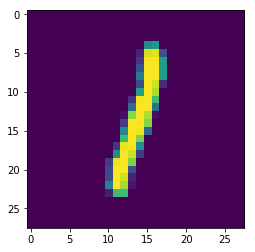

In [2]:

learning_rate=0.01
batch_size=100
display_step = 1
mnist = input_data.read_data_sets('data/mnist_data/',one_hot=True)

X=tf.placeholder(dtype=tf.float32,shape=[None,784], name='X')
Y=tf.placeholder(dtype=tf.float32,shape=[None,10], name='Y')

with tf.name_scope('parameter_W_and_b_initialization'):
    W = tf.Variable(tf.zeros([784,10]),name='W')
    b= tf.Variable(tf.zeros([10]),name='b')

with tf.name_scope('linear'):
    Z=tf.matmul(X,W) +b

with tf.name_scope('predict'):
    A=tf.nn.softmax(Z)

with tf.name_scope('cost'):
    cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(A), axis=-1))

with tf.name_scope('train'):    
    train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    batch_index=0
    total_batch = int(mnist.train.num_examples/batch_size)
    with tf.name_scope('fit_with_training_data'):
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, batch_cost = sess.run([train_step, cost], feed_dict={X:batch_xs,Y:batch_ys}) 
            batch_index +=1
        #print("Batch:", '%04d' % (batch_index), "cost=", "{:.9f}".format(batch_cost))                        
            
    print("Optimization Finished!")     
    print(str(W))
    print(str(b))
    
    with tf.name_scope('calculate_accuracy'):
        # Test model
        correct_prediction = tf.equal(tf.argmax(A, 1), tf.argmax(Y, 1))
        # Calculate accuracy
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

        print("Train Accuracy:", accuracy.eval({X: mnist.train.images, Y: mnist.train.labels}))
        print("Test Accuracy:", accuracy.eval({X: mnist.test.images, Y: mnist.test.labels}))
    
    with tf.name_scope('single_image_test'):
        image=mnist.train.images[600]
        result=sess.run(tf.argmax(A,axis=1),feed_dict={X:image.reshape(1,784)})
        print("The recognized digit is {}".format(result))
        plt.imshow(image.reshape(28,28))
    
writer = tf.summary.FileWriter('./tbout/mnistBetterLogging',sess.graph)
writer.close()    

Improvement using named scope

![alt text](namescope.png "Improve Graph using name scope")